In [1]:
import numpy as np
from matplotlib import pyplot as plt

## ニューラルネットワーク
### 活性化関数

In [2]:
x = np.arange(-10, 10, 0.1)

In [3]:
def step_func(x):
    #yにはbool値が入る
    y = x > 0
    #True => 1, False => 0 に変換
    return y.astype(np.int)

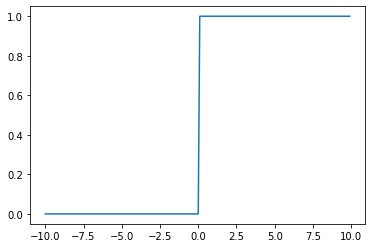

In [4]:
#step関数の可視化
y_step = step_func(x)
plt.plot(x, y_step)

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

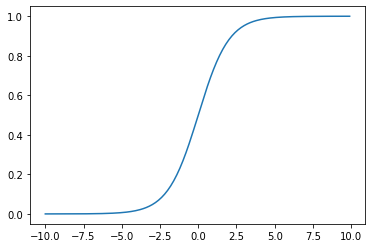

In [6]:
#sigmoid関数の可視化
y_sigmoid = sigmoid(x)
plt.plot(x,y_sigmoid)

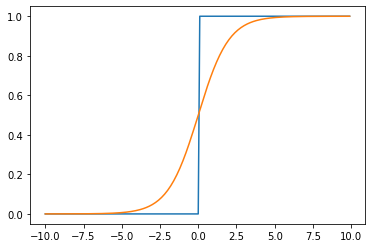

In [7]:
#重ねて出力
plt.plot(x, y_step)
plt.plot(x,y_sigmoid)

In [8]:
def relu(x):
    return np.maximum(0, x)

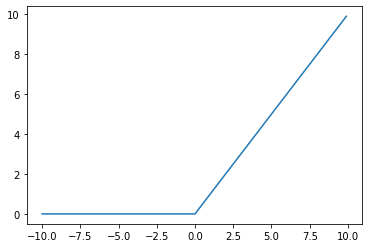

In [9]:
y_relu = relu(x)
plt.plot(x, y_relu)

## 順伝播

In [10]:
#3層のNNの実装

In [11]:
def identitiy_func(x):
    return x

In [12]:
def init_network():
        network = {}
        
        n_input = 2
        n_hidden1 = 3
        n_hidden2 = 2
        n_output = 2
        
        network['W1'] = np.random.randn(n_input,n_hidden1)
        network['b1'] = np.random.randn(n_hidden1)
        network['W2'] = np.random.randn(n_hidden1, n_hidden2)
        network['b2'] = np.random.randn(n_hidden2)
        network['W3'] = np.random.randn(n_hidden2, n_output)
        network['b3'] = np.random.randn(n_output)
        
        return network

In [13]:
def forward(nw, X):
    W1, W2, W3 = nw['W1'], nw['W2'], nw['W3']
    b1, b2, b3 = nw['b1'], nw['b2'], nw['b3']
    
    X1 = np.dot(X,W1) + b1
    Z1 = sigmoid(X1)
    X2 = np.dot(Z1,W2) + b2
    Z2 = sigmoid(X2)
    X3 = np.dot(Z2,W3) + b3
    y = identitiy_func(X3)
    
    return y

In [14]:
nw = init_network()
X = np.array([1.0, 0.5])
y = forward(nw, X)
print(y)

[1.88500948 0.77253385]


## 手書き数字認識

In [58]:
import sys
import os
sys.path.append(os.pardir)

In [59]:
#ライブラリではなくローカルファイルからインポート
from dataset.mnist import load_mnist

In [18]:
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [20]:
from PIL import Image

In [21]:
def show_img(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [22]:
img = x_train[0]
label = y_train[0]
img_2d = img.reshape(28, 28)
show_img(img_2d)

### バッチ処理の実装

In [24]:
import pickle

In [51]:
def get_data():
    (x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, y_test

In [52]:
def init_nw():
    with open ('sample_weight.pkl', 'rb') as f:
        nw = pickle.load(f)
    return nw

In [53]:
 def softmax(x):
        c = np.max(x)
        exp_x = np.exp(x - c)
        sum_exp_x = np.sum(exp_x)
        y = exp_x/sum_exp_x
        return y

In [54]:
def predict(nw, X):
    W1, W2, W3 = nw['W1'], nw['W2'], nw['W3']
    b1, b2, b3 = nw['b1'], nw['b2'], nw['b3']
    
    X1 = np.dot(X,W1) + b1
    Z1 = sigmoid(X1)
    X2 = np.dot(Z1,W2) + b2
    Z2 = sigmoid(X2)
    X3 = np.dot(Z2,W3) + b3
    y = softmax(X3)
    
    return y

In [55]:
x, y = get_data()
nw = init_nw()

In [56]:
batch_size = 100

In [57]:
acc = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(nw, x_batch)
    p = np.argmax(y_batch, axis=1)
    acc += np.sum(p == y[i:i+batch_size])

print('Accuracy {}'.format(float(acc)/len(x)))

Accuracy 0.9352
